✅STEP 1:Load and Prepare Data

 Load stock data

In [57]:
import pandas as pd

# ✅ List of stock data files
csv_files = [
    r"c:\10 Kifia Tasks\yfinance_data\AAPL_historical_data.csv",
    r"c:\10 Kifia Tasks\yfinance_data\AMZN_historical_data.csv",
    r"c:\10 Kifia Tasks\yfinance_data\GOOG_historical_data.csv",
    r"c:\10 Kifia Tasks\yfinance_data\META_historical_data.csv",
    r"c:\10 Kifia Tasks\yfinance_data\MSFT_historical_data.csv",
    r"c:\10 Kifia Tasks\yfinance_data\NVDA_historical_data.csv",
    r"c:\10 Kifia Tasks\yfinance_data\TSLA_historical_data.csv"
]

# ✅ Load datasets into a dictionary
stock_data = {}
for file in csv_files:
    stock_name = file.split("\\")[-1].split("_")[0]  # Extract stock ticker
    stock_data[stock_name] = pd.read_csv(file, parse_dates=["Date"], index_col="Date")

# ✅ Display sample data for AAPL, AMZN, GOOG, META, MSFT, NVDA and TSLA
for ticker in ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]:
    print(f"Sample data for {ticker}:")
    print(stock_data[ticker].head())
    print("-" * 40)
print("🚀 Stock datasets loaded successfully!")


Sample data for AAPL:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  
----------------------------------------
Sample data for AMZN:
                Open      High       Low     Close  Adj Close      Volume  \
Date                                   

installation

In [64]:
%pip install pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\samuel\appdata\local\programs\python\python312\lib\site-packages (2.2.3)



✅ Step 2: Load Stock Data Using PyNance

✔ Compute Moving Averages (SMA)

In [65]:
import numpy as np

for stock in stock_data:
    stock_data[stock]["SMA_50"] = stock_data[stock]["Close"].rolling(window=50).mean()
    stock_data[stock]["SMA_200"] = stock_data[stock]["Close"].rolling(window=200).mean()
# ✅ Display the first few rows of AAPL, AMZN, GOOG, META, MSFT, NVDA and TSLA with SMA columns
for ticker in ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]:
    print(f"Sample data with SMA for {ticker}:")
    print(stock_data[ticker][["Close", "SMA_50", "SMA_200"]].head())
    print("-" * 40)


Sample data with SMA for AAPL:
               Close  SMA_50  SMA_200
Date                                 
1980-12-12  0.128348     NaN      NaN
1980-12-15  0.121652     NaN      NaN
1980-12-16  0.112723     NaN      NaN
1980-12-17  0.115513     NaN      NaN
1980-12-18  0.118862     NaN      NaN
----------------------------------------
Sample data with SMA for AMZN:
               Close  SMA_50  SMA_200
Date                                 
1997-05-15  0.097917     NaN      NaN
1997-05-16  0.086458     NaN      NaN
1997-05-19  0.085417     NaN      NaN
1997-05-20  0.081771     NaN      NaN
1997-05-21  0.071354     NaN      NaN
----------------------------------------
Sample data with SMA for GOOG:
               Close  SMA_50  SMA_200
Date                                 
2004-08-19  2.499133     NaN      NaN
2004-08-20  2.697639     NaN      NaN
2004-08-23  2.724787     NaN      NaN
2004-08-24  2.611960     NaN      NaN
2004-08-25  2.640104     NaN      NaN
---------------------------

✔ Compute Relative Strength Index (RSI)

In [66]:
for stock in stock_data:
    stock_data[stock]["Price Change"] = stock_data[stock]["Close"].diff()
    stock_data[stock]["Gain"] = np.where(stock_data[stock]["Price Change"] > 0, stock_data[stock]["Price Change"], 0)
    stock_data[stock]["Loss"] = np.where(stock_data[stock]["Price Change"] < 0, abs(stock_data[stock]["Price Change"]), 0)
    stock_data[stock]["Avg Gain"] = stock_data[stock]["Gain"].rolling(window=14).mean()
    stock_data[stock]["Avg Loss"] = stock_data[stock]["Loss"].rolling(window=14).mean()
    stock_data[stock]["RS"] = stock_data[stock]["Avg Gain"] / stock_data[stock]["Avg Loss"]
    stock_data[stock]["RSI"] = 100 - (100 / (1 + stock_data[stock]["RS"]))
    


✔ Compute MACD (Moving Average Convergence Divergence)

In [67]:
for stock in stock_data:
    stock_data[stock]["EMA_12"] = stock_data[stock]["Close"].ewm(span=12, adjust=False).mean()
    stock_data[stock]["EMA_26"] = stock_data[stock]["Close"].ewm(span=26, adjust=False).mean()
    stock_data[stock]["MACD"] = stock_data[stock]["EMA_12"] - stock_data[stock]["EMA_26"]
    stock_data[stock]["MACD_Signal"] = stock_data[stock]["MACD"].ewm(span=9, adjust=False).mean()


✅ STEP 3: Visualize Stock Trends

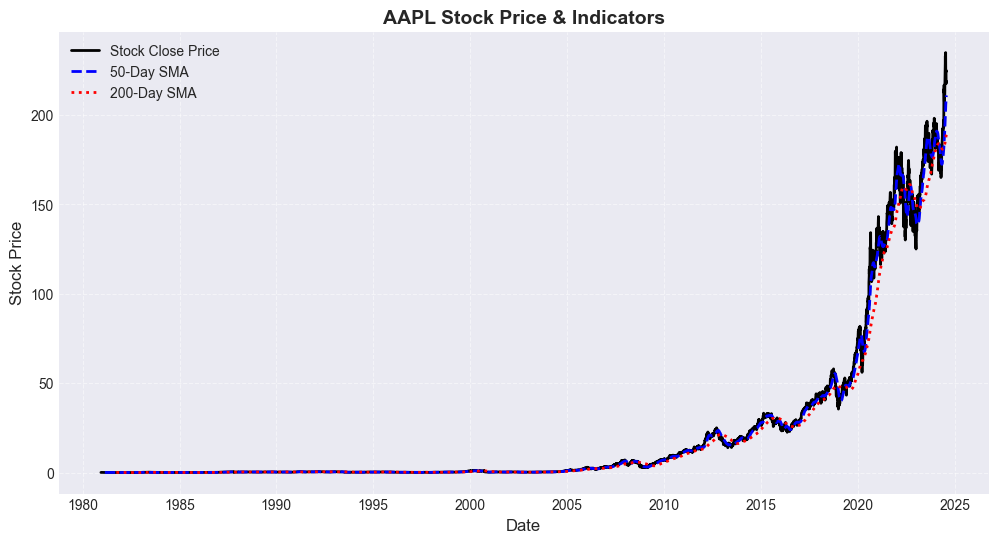

<Figure size 640x480 with 0 Axes>

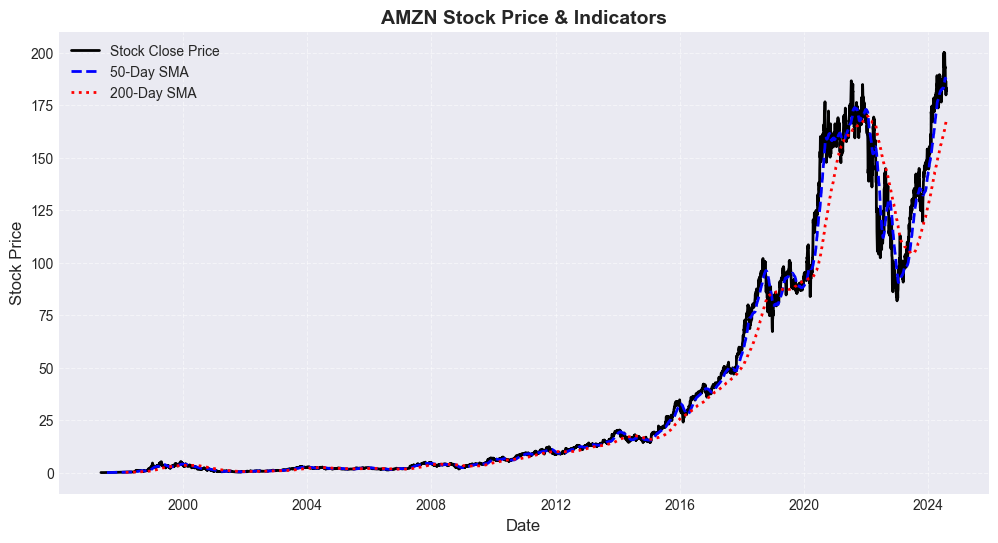

<Figure size 640x480 with 0 Axes>

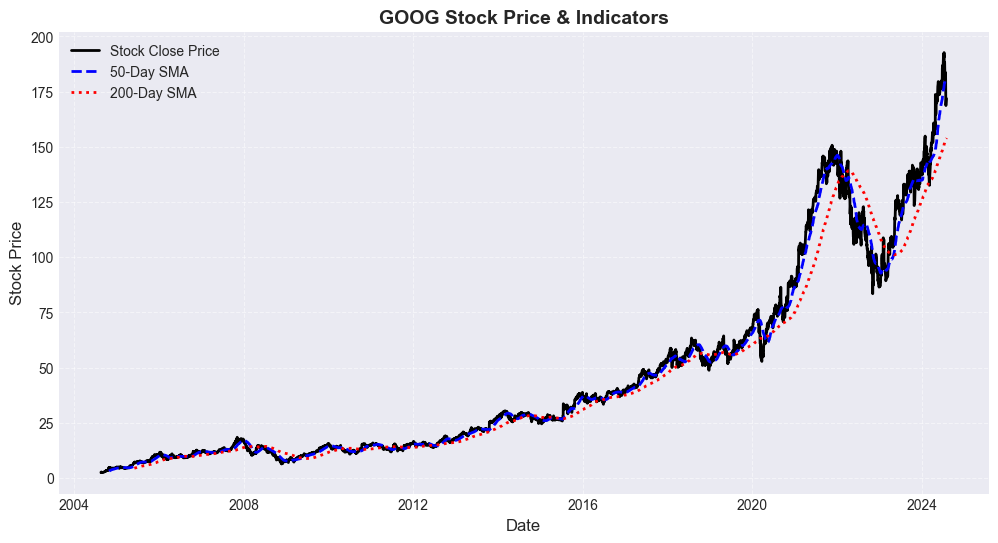

<Figure size 640x480 with 0 Axes>

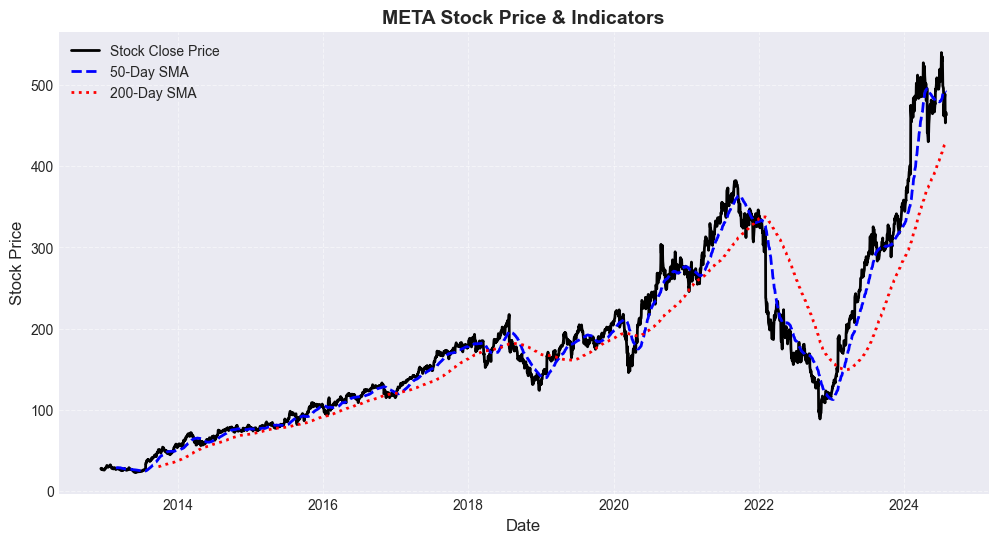

<Figure size 640x480 with 0 Axes>

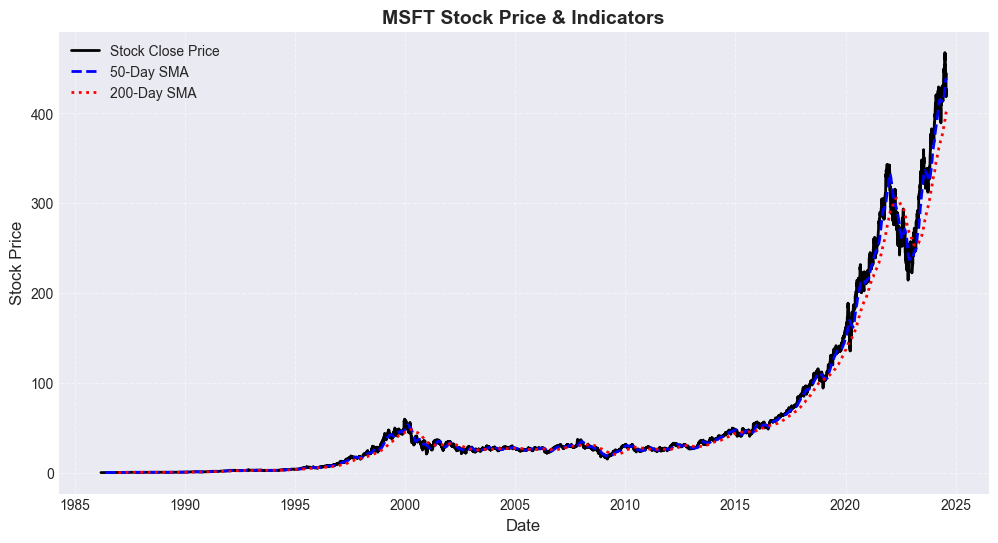

<Figure size 640x480 with 0 Axes>

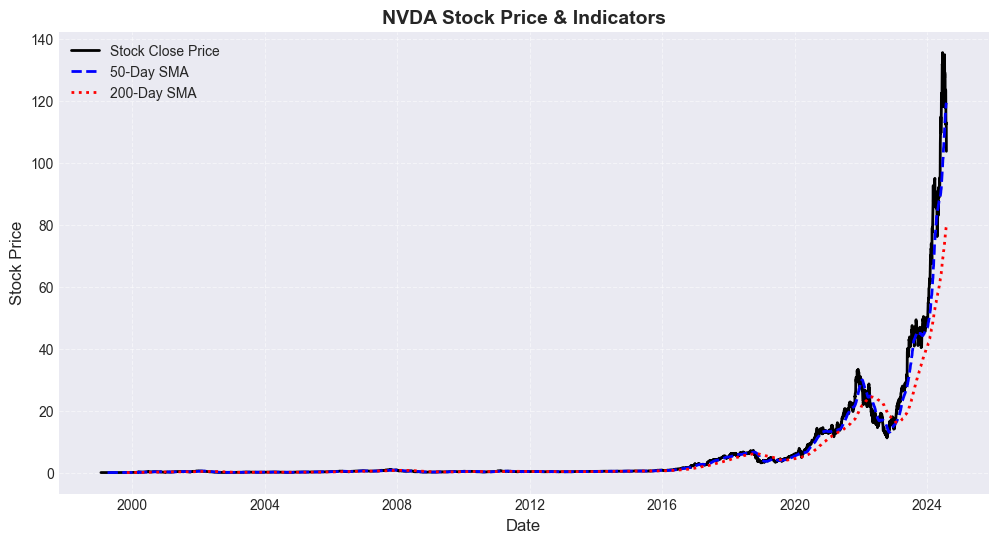

<Figure size 640x480 with 0 Axes>

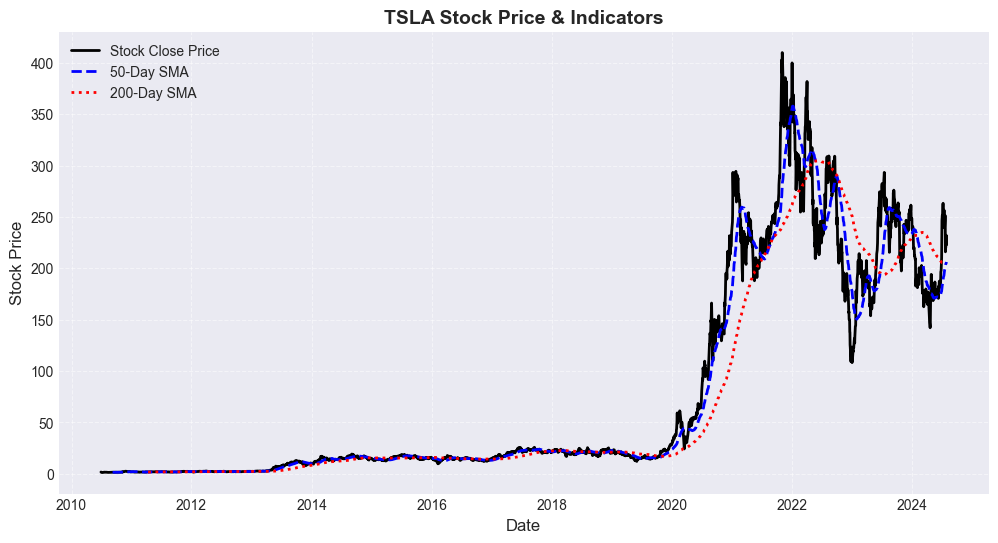

<Figure size 640x480 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt

# ✅ Define stock tickers
stocks = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

# ✅ Generate individual graphs for each stock
for stock in stocks:
    plt.figure(figsize=(12, 6))

    # ✅ Plot stock price & moving averages
    plt.plot(stock_data[stock].index, stock_data[stock]["Close"], label="Stock Close Price", color="black", linewidth=2)
    plt.plot(stock_data[stock].index, stock_data[stock]["SMA_50"], label="50-Day SMA", color="blue", linestyle="--", linewidth=2)
    plt.plot(stock_data[stock].index, stock_data[stock]["SMA_200"], label="200-Day SMA", color="red", linestyle=":", linewidth=2)

    # ✅ Formatting for each graph
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    plt.title(f"{stock} Stock Price & Indicators", fontsize=14, fontweight="bold")
    plt.legend(loc="upper left", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.5)

    # ✅ Show individual graph
    plt.show()
    # ✅ Save individual graph
    plt.savefig(f"{stock}_stock_analysis.png")
    

